# Exploratory Analysis of Spotify Top Charts Data (2017)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-charts/charts.csv


## Explore data

In [2]:
df = pd.read_csv(r'/kaggle/input/spotify-charts/charts.csv')
print(df.head())

                         title  rank        date  \
0      Chantaje (feat. Maluma)     1  2017-01-01   
1  Vente Pa' Ca (feat. Maluma)     2  2017-01-01   
2   Reggaetón Lento (Bailemos)     3  2017-01-01   
3                       Safari     4  2017-01-01   
4                  Shaky Shaky     5  2017-01-01   

                                  artist  \
0                                Shakira   
1                           Ricky Martin   
2                                   CNCO   
3  J Balvin, Pharrell Williams, BIA, Sky   
4                           Daddy Yankee   

                                                 url     region   chart  \
0  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  Argentina  top200   
1  https://open.spotify.com/track/7DM4BPaS7uofFul...  Argentina  top200   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  Argentina  top200   
3  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  Argentina  top200   
4  https://open.spotify.com/track/58IL315gMSTD3

In [3]:
list(df.columns)

['title',
 'rank',
 'date',
 'artist',
 'url',
 'region',
 'chart',
 'trend',
 'streams']

In [4]:
list(df.region.unique())

['Argentina',
 'Australia',
 'Brazil',
 'Austria',
 'Belgium',
 'Colombia',
 'Bolivia',
 'Denmark',
 'Bulgaria',
 'Canada',
 'Chile',
 'Costa Rica',
 'Czech Republic',
 'Finland',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'France',
 'Germany',
 'Global',
 'Greece',
 'Guatemala',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'Indonesia',
 'Ireland',
 'Italy',
 'Japan',
 'Latvia',
 'Lithuania',
 'Malaysia',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Singapore',
 'Spain',
 'Slovakia',
 'Sweden',
 'Taiwan',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Thailand',
 'Andorra',
 'Romania',
 'Vietnam',
 'Egypt',
 'India',
 'Israel',
 'Morocco',
 'Saudi Arabia',
 'South Africa',
 'United Arab Emirates',
 'Russia',
 'Ukraine',
 'South Korea']

In [5]:
list(df.chart.unique())

['top200', 'viral50']

In [6]:
df['artist'].value_counts()

Ed Sheeran                                                                 387917
Billie Eilish                                                              251825
Post Malone                                                                211272
Bad Bunny                                                                  203403
Ariana Grande                                                              189914
                                                                            ...  
Ezhel, Patron, Anıl Piyancı, Sansar Salvo, Allame, Pit10, Beta, Kamufle         1
Lips, George Mason, Rose McIver, Kimbra                                         1
Joakim Kleven, KOH                                                              1
Lazyloxy, Maiyarap, OG-ANIC, UrboyTJ                                            1
Luna 99                                                                         1
Name: artist, Length: 96156, dtype: int64

In [7]:
print(df[df['artist'] == 'Ed Sheeran'])

                      title  rank        date      artist  \
309       Thinking out Loud   109  2017-01-01  Ed Sheeran   
341              Photograph   140  2017-01-01  Ed Sheeran   
571              Photograph   169  2017-01-01  Ed Sheeran   
695       Thinking out Loud    93  2017-01-01  Ed Sheeran   
737              Photograph   135  2017-01-01  Ed Sheeran   
...                     ...   ...         ...         ...   
26173275         Bad Habits    11  2021-07-31  Ed Sheeran   
26173336         Bad Habits    22  2021-07-31  Ed Sheeran   
26173410         Bad Habits    46  2021-07-31  Ed Sheeran   
26173427         Bad Habits    13  2021-07-31  Ed Sheeran   
26173499         Bad Habits    36  2021-07-31  Ed Sheeran   

                                                        url  \
309       https://open.spotify.com/track/1Slwb6dOYkBlWal...   
341       https://open.spotify.com/track/6fxVffaTuwjgEk5...   
571       https://open.spotify.com/track/6fxVffaTuwjgEk5...   
695       https

## Reformat trend column

In [8]:
# View current formatting
#Abby Lloyd
print(df.trend.unique())

['SAME_POSITION' 'MOVE_UP' 'MOVE_DOWN' 'NEW_ENTRY']


In [9]:
# Build formatting function
def get_formatted_trend(value):
    result = re.fullmatch(r'([A-Z]+)(_)([A-Z]+)', value)
    if result:
        part1, part2, part3 = result.groups()
        return part1.lower() + ' ' + part3.lower()
    else:
        return value

# Map values to new Series
formatted_trend = df['trend'].map(get_formatted_trend)

# Replace previous values with formatted values
df['trend'] = formatted_trend

# Check work
print(df.trend.unique())
                          

['same position' 'move up' 'move down' 'new entry']


## Function to determine which country the artist is most popular in

In [10]:
def get_country_score(artist):
    artist_df = df[df['artist'] == artist]
    score = {}
    for index, row in artist_df.iterrows():
        if row['region'] in score:
            score[row['region']] += (201 - row['rank'])
        else:
            score[row['region']] = (201 - row['rank'])
    # score_items = score.items()
    # sorted_items = sorted(score_items, key = lambda x: x[1], reverse=True)
    # return print(sorted_items)
    return score
    
    

## Function to visualize an artist's top 10 regions by popularity

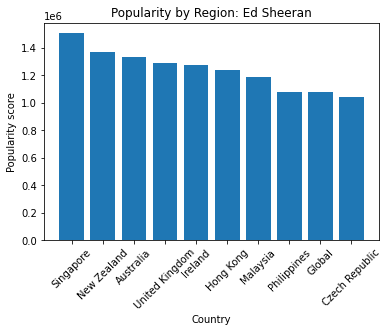

In [11]:
def visualize_country_score(artist):
    score = get_country_score(artist)
    score_items = score.items()
    sorted_items = sorted(score_items, key = lambda x: x[1], reverse=True)
    country, score = zip(*sorted_items)
    plt.bar(country[:10], score[:10])
    plt.xticks(rotation = 45)
    plt.xlabel('Country')
    plt.ylabel('Popularity score')
    plt.title(f'Popularity by Region: {artist}')
    plt.show()

visualize_country_score('Ed Sheeran')